## Intro

In [39]:
#Set-up

from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from future import standard_library
standard_library.install_aliases()
from future.builtins import (
         bytes, dict, int, list, object, range, str,
         ascii, chr, hex, input, next, oct, open,
         pow, round, super, filter, map, zip)

In [40]:
import pandas as pd
pd.__version__

'1.2.3'

In [41]:
# to imbed plots, prevents pop-up windows for plots
%matplotlib inline

## Data Reading

In [9]:
# Reading data from a file
google = pd.read_csv('strata_data/data/goog.csv', index_col='Date', parse_dates=True)
google

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
...,...,...,...,...,...
2014-12-24,530.51,531.76,527.02,528.77,704035.0
2014-12-26,528.77,534.25,527.31,534.03,1037727.0
2014-12-29,532.19,535.48,530.01,530.33,2276104.0


In [10]:
# Reading data from the Web
from pandas_datareader import data as pd_data

start  = pd.Timestamp('2010-1-1')
end    = pd.Timestamp('2014-12-31')
google = pd_data.DataReader("GOOG", 'google', start, end)

NotImplementedError: data_source='google' is not implemented

## Data Containers

In [11]:
type(google)

pandas.core.frame.DataFrame

## Data Inspection

In [15]:
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN


In [16]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  194 non-null    float64
dtypes: float64(5)
memory usage: 58.9 KB


## Data Indexing

In [42]:
# Access an entire column using []
google['Open']

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
               ...  
2014-12-26    528.77
2014-12-29    532.19
2014-12-30    528.09
2014-12-31    531.25
Name: Open, Length: 1257, dtype: float64

In [18]:
# Inspect the first 5 rows or the 'Open' column, using integer indexing
google['Open'].iloc[0:5]

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
Name: Open, dtype: float64

In [19]:
# Inspect the first 5 rows or the 'Open' column, using date indexing
google.loc['2010-01-04':'2010-01-08','Open']

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
Name: Open, dtype: float64

## Data Filtering

In [20]:
# Filtering by conditional
google_up = google[ google['Close'] > google['Open'] ]
google_up.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,295.70,301.32,294.26,300.71,NaN
2010-01-13,287.96,293.90,286.66,293.25,NaN
2010-01-14,291.66,296.80,291.11,294.63,NaN
2010-01-19,290.45,294.91,287.86,293.52,NaN
2010-01-26,268.72,274.53,267.88,270.94,NaN


In [21]:
# Filtering out missing data
google_filtered = google[pd.isnull(google['Volume']) == False ]
google_filtered.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,564.86,565.40,550.50,556.58,3826676.0
2014-03-28,558.94,566.03,558.33,559.51,2258918.0
2014-03-31,564.63,566.93,555.87,556.70,1942277.0
2014-04-01,559.57,568.18,558.44,566.88,2182626.0
2014-04-02,282.43,571.83,561.44,566.98,2088804.0


## Data Statistics

In [43]:
google.describe()

,Open,High,Low,Close,Volume,Return,LogReturn,Volatility
count,1257.000000,1257.000000,1257.000000,1257.000000,1.940000e+02,1256.000000,1256.000000,1005.000000
mean,375.275593,378.450247,372.132474,375.327064,1.937264e+06,0.000536,0.000414,0.246663
std,115.684354,116.288827,114.935742,115.664301,9.842775e+05,0.015690,0.015621,0.035072
min,218.940000,220.920000,216.600000,217.820000,7.040350e+05,-0.083795,-0.087515,0.194855
25%,285.790000,288.760000,283.060000,285.450000,1.338451e+06,-0.007200,-0.007226,0.215669
50%,318.330000,320.800000,315.180000,317.260000,1.684634e+06,0.000267,0.000267,0.236553
75%,452.540000,456.020000,449.740000,452.830000,2.164369e+06,0.008572,0.008536,0.275793
max,612.790000,613.830000,608.690000,609.470000,6.795393e+06,0.137966,0.129242,0.308908


## Data Computations

In [23]:
# Compute the returns from daily percent change
# Append a new column
google['Return'] = google['Close'].pct_change()
google['Return'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004408
2010-01-06   -0.025186
2010-01-07   -0.023303
2010-01-08    0.013345
Name: Return, dtype: float64

In [24]:
# Compute the log() of the return using numpy
# Append another new column
import numpy as np
google['LogReturn'] = np.log(1+google['Return'])
google['LogReturn'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004418
2010-01-06   -0.025509
2010-01-07   -0.023578
2010-01-08    0.013256
Name: LogReturn, dtype: float64

In [29]:
# Compute volatility as rolling standard deviation of the log() of the returns
# Append yet another new column
window_size = 252
# the following had some deprecated code which was updated blow
# google['Volatility'] = pd.rolling_std(google['LogReturn'], window=window_size) * np.sqrt(window_size)
google['Volatility'] = google['LogReturn'].rolling(window=window_size).std() * np.sqrt(window_size)
google['Volatility'].iloc[window_size-5:window_size+5]

Date
2010-12-28         NaN
2010-12-29         NaN
2010-12-30         NaN
2010-12-31         NaN
2011-01-03         NaN
2011-01-04    0.278561
2011-01-05    0.278770
2011-01-06    0.277694
2011-01-07    0.276720
2011-01-10    0.276432
Name: Volatility, dtype: float64

## Data Visualization

In [30]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1257 non-null   float64
 1   High        1257 non-null   float64
 2   Low         1257 non-null   float64
 3   Close       1257 non-null   float64
 4   Volume      194 non-null    float64
 5   Return      1256 non-null   float64
 6   LogReturn   1256 non-null   float64
 7   Volatility  1005 non-null   float64
dtypes: float64(8)
memory usage: 120.7 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

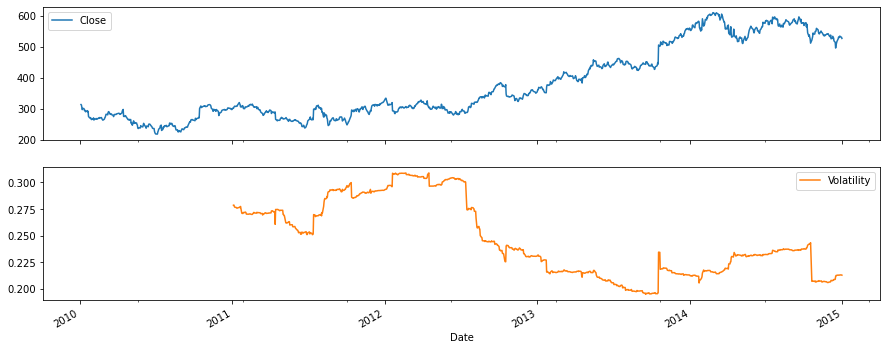

In [31]:
google[['Close','Volatility']].plot(subplots=True, figsize=(15,6))

## Set up

In [34]:
# Numerical computing
import numpy as np

# Draw pictures!
import matplotlib.pyplot as plt
%matplotlib inline

# Python people are weird!
import pandas as pd

# Set Jupyter notebook display options
pd.options.display.max_rows = 8
pd.options.display.max_columns = 8

# Check version number
pd.__version__

'1.2.3'

## Creating a Series

In [32]:
# Example: Creating a Series from a data column from file
file   = "strata_data/data/exoplanets.csv"
data   = pd.read_csv(file)
series = data['NAME']

print( "\n" )
print( series )

print( "\n" )
print( type( series ) )



0          gamma Cep b
1          HD 114762 b
2       PSR B1257+12 B
3       PSR B1257+12 A
4           beta Gem b
             ...      
1637         HD 5319 c
1638         WASP-89 b
1639         HD 1666 b
1640        HD 95127 b
1641      Kepler-432 c
Name: NAME, Length: 1642, dtype: object


<class 'pandas.core.series.Series'>


In [35]:
# Example: Creating a Series a list
new_list = [5,10,15,20,25]
pd.Series(new_list)

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [36]:
# Example: Creating a Series from a dictionary... index will be sorted
new_dictionary = {'b': 100, 'a': 200.0, 'd':450, 'c':700}
pd.Series(new_dictionary)

b    100.0
a    200.0
d    450.0
c    700.0
dtype: float64

In [37]:
# Example: Creating a Series from an ORDERED dictionary
#          ... to preserver order of the indices.
from collections import OrderedDict
od = OrderedDict([('b', 100), ('a',200), ('d',450), ('c',700)])
pd.Series(od)

b    100
a    200
d    450
c    700
dtype: int64

In [38]:
# Example: Creating a Series from a NumPy array

array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

print( "\n" )
print( array1 )
print( type(array1) )

print( "\n" )
print( series1 )
print( type(series1) )



[10. 20. 30. 40. 50.]
<class 'numpy.ndarray'>


0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
<class 'pandas.core.series.Series'>


## Pandas Index

In [44]:
# The default Index is just a sequence of integers:
array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

series1.index

RangeIndex(start=0, stop=5, step=1)

In [45]:
# The Index is used for indexing

print( series1.iloc[0] )  # "Positional" indexing

10.0


In [49]:
# The Index can be set to a sequence of labels:

index2 = ['a','b','c','d','a']
series2 = pd.Series(np.arange(1,6)*10.0, index=index2)

In [47]:
# Indexing when the label is not unique?

series2.loc['a']

a    10.0
a    50.0
dtype: float64

## Iterating over a series

In [50]:
for key, value in series2.iteritems():
    print(key, value)

a 10.0
b 20.0
c 30.0
d 40.0
a 50.0


## Slicing

In [51]:
# Positional indexing and slicing

series1.iloc[1:3]

1    20.0
2    30.0
dtype: float64

In [52]:
# Be careful when slicing with integers versus labels

print( series2.iloc[1:2]     )  # Positional indexing is permitted with slicing
print("\n")
print( series2.loc['b':'c'] )  # Ranges of labels can be sliced (slicing here is *inclusive*)

b    20.0
dtype: float64


b    20.0
c    30.0
dtype: float64


In [53]:
# Example: slice from the end
series2.iloc[-1:]

a    50.0
dtype: float64

In [54]:
# Example: slice from the beginning
series2.iloc[:-3]

a    10.0
b    20.0
dtype: float64

In [55]:
# Example: slice with labels, but with integer step size
series2.loc['d':'b':-2]

d    40.0
b    20.0
dtype: float64

## Series arithmetic

In [56]:
# Arithmetic with Series is as with numpy arrays
print(series1)

series2 = series1 * 2 
print(series2)

series3 = series2 * 3
print(series3)

0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
0     20.0
1     40.0
2     60.0
3     80.0
4    100.0
dtype: float64
0     60.0
1    120.0
2    180.0
3    240.0
4    300.0
dtype: float64


## Series with NumPy

In [57]:
# numpy ufuncs can be applied elementwise to Series

series_2pi = pd.Series( np.linspace(-1*np.pi, +1*np.pi, 100) )
series_2pi

0    -3.141593
1    -3.078126
2    -3.014660
3    -2.951193
        ...   
96    2.951193
97    3.014660
98    3.078126
99    3.141593
Length: 100, dtype: float64

In [58]:
# Even though pandas was built on numpy, numpy methods on Series return a Series

series_sin = np.sin( series_2pi )
print( series_sin )
print( type( series_sin ) )

0    -1.224647e-16
1    -6.342392e-02
2    -1.265925e-01
3    -1.892512e-01
          ...     
96    1.892512e-01
97    1.265925e-01
98    6.342392e-02
99    1.224647e-16
Length: 100, dtype: float64
<class 'pandas.core.series.Series'>


## Series with Matplotlib

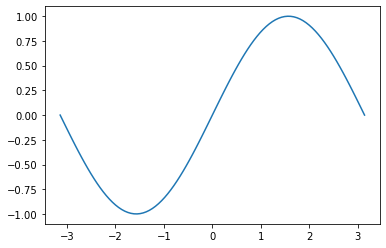

In [59]:
plt.plot(series_2pi, series_sin)

## Series operations

In [60]:
# You can add two series

series1 = pd.Series([1,2,3,4,5])
print(series1)

series2 = pd.Series([10,20,30,40,50])
print(series2)

series3 = series1 + series2
print(series3)

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    10
1    20
2    30
3    40
4    50
dtype: int64
0    11
1    22
2    33
3    44
4    55
dtype: int64


In [61]:
# Even better when you assign labels to your data!

series1 = pd.Series([1,2,3,4,5],      index=['a','b','c','d','e'])
series2 = pd.Series([10,20,30,40,50], index=['c','d','e','f','g'])

print( series1 + series2 )

a     NaN
b     NaN
c    13.0
d    24.0
e    35.0
f     NaN
g     NaN
dtype: float64


In [62]:
# So when you apply a method like mean(), the NaNs are handled intelligently...

(series1 + series2).mean()

24.0

In [63]:
# Contrast how NumPy and Pandas handle NaN:

print( "Pandas mean: ", pd.Series( [1.0, 2.0, np.nan] ).mean() )
print( "Numpy mean:  ", np.array(  [1.0, 2.0, np.nan] ).mean() )

Pandas mean:  1.5
Numpy mean:   nan


## Creating a dataframe

In [66]:
# Creating a DataFrame from a file read:

file    = "strata_data/data/exoplanets.csv"
df_file = pd.read_csv(file)
df_file

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
3,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1638,WASP-89 b,Hellier 2015,http://adsabs.harvard.edu/abs/2015AJ....150...18H,2015,...,20:55:35.98,-18:58:16.1,0.920000,0.880000
1639,HD 1666 b,Harakawa 2015,http://adsabs.harvard.edu/abs/2015ApJ...806....5H,2015,...,+00:20:52.34,-19:55:51.89,1.500000,1.930000
1640,HD 95127 b,Niedzielski 2015,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,2015,...,+10:59:35.10,+43:48:52.17,1.200000,20.000000
1641,Kepler-432 c,Ciceri 2015,http://adsabs.harvard.edu/abs/2015A%26A...573L...,2015,...,19:33:07.729,+48:17:09.,1.320000,4.060000


In [67]:
# Creating a DataFrame from a dictionary

dictionary = {'a':[1,2,3,4,5,6,7,8,9,10],
              'b':np.linspace(0,np.pi,10),
              'c':0.0,
              'd':["a","b","c","a","b","c","a","b","c","a"]}

df_dict = pd.DataFrame(dictionary)
df_dict

,a,b,c,d
0,1,0.000000,0.0,a
1,2,0.349066,0.0,b
2,3,0.698132,0.0,c
3,4,1.047198,0.0,a
...,...,...,...,...
6,7,2.094395,0.0,a
7,8,2.443461,0.0,b
8,9,2.792527,0.0,c
9,10,3.141593,0.0,a


In [68]:
# Inspect the DataFrame colums and index
df_dict.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [69]:
df_dict.index

RangeIndex(start=0, stop=10, step=1)

In [70]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10 non-null     int64  
 1   b       10 non-null     float64
 2   c       10 non-null     float64
 3   d       10 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [71]:
## Dataframe indexing

In [72]:
df_grades = pd.DataFrame({'Alice' : [1,2,3,4,5], 
                         'Bob':np.random.random(5), 
                         'Chuck' : np.random.random(5)},
                         index=['Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_grades

,Alice,Bob,Chuck
Jan,1,0.941712,0.937682
Feb,2,0.105077,0.296471
Mar,3,0.439441,0.603028
Apr,4,0.452443,0.436780
May,5,0.197276,0.505242


In [73]:
# Indexing is by column first (gives a Series)
series_a = df_grades['Alice']

print( series_a )
print( type(series_a) )

Jan    1
Feb    2
Mar    3
Apr    4
May    5
Name: Alice, dtype: int64
<class 'pandas.core.series.Series'>


In [74]:
# Indexing the column name, gives a Series, then 'positional' indexing
df_grades['Alice'].iloc[1]

2

In [75]:
# Indexing the column name, gives a Series, then 'label' indexing
df_grades.loc['Jan','Alice']

1

## Iterating over a DataFrame

In [76]:
for key, value in df_grades['Alice'].iteritems():
    print('Key:', '%s' % key, ', Value:', '%s' % value)

Key: Jan , Value: 1
Key: Feb , Value: 2
Key: Mar , Value: 3
Key: Apr , Value: 4
Key: May , Value: 5


In [77]:
for index, row in df_grades.iterrows():
    print('Index:', '%s' % index, ', Row:', '%s' % row['Alice'])

Index: Jan , Row: 1.0
Index: Feb , Row: 2.0
Index: Mar , Row: 3.0
Index: Apr , Row: 4.0
Index: May , Row: 5.0


## DataFrame Manipulation

In [78]:
# Extract a column as a new DataFrame
df_col = df_grades[['Alice']]
print( df_col, "\n", type(df_col) )

     Alice
Jan      1
Feb      2
Mar      3
Apr      4
May      5 
 <class 'pandas.core.frame.DataFrame'>


In [79]:
# Extract a row as a new DataFrame
df_row = df_grades.loc['Jan':'Jan']
print( df_row, "\n", type(df_row) )

     Alice       Bob     Chuck
Jan      1  0.941712  0.937682 
 <class 'pandas.core.frame.DataFrame'>


In [80]:
# Slicing along rows works just as with Series
df_grades.loc['Jan':'Mar','Alice']

Jan    1
Feb    2
Mar    3
Name: Alice, dtype: int64

In [81]:
# For column range, need to use the .ix attribute of the DataFrame
df_grades.loc[:,'Alice':'Bob']

,Alice,Bob
Jan,1,0.941712
Feb,2,0.105077
Mar,3,0.439441
Apr,4,0.452443
May,5,0.197276


In [82]:
# For extracting row and column ranges
df_grades.loc['Mar':'Apr', 'Bob':'Chuck']

,Bob,Chuck
Mar,0.439441,0.603028
Apr,0.452443,0.436780


In [83]:
# Boolean masks work too
df_grades.loc[df_grades['Bob'] < .5]

,Alice,Bob,Chuck
Feb,2,0.105077,0.296471
Mar,3,0.439441,0.603028
Apr,4,0.452443,0.436780
May,5,0.197276,0.505242


In [84]:
# Pandas DataFrames can be cast to other types

my_list  = list(df_grades['Alice'])
print( my_list, type(my_list) )

my_array = np.array(df_grades['Alice'])
print( my_array, type(my_array) )

[1, 2, 3, 4, 5] <class 'list'>
[1 2 3 4 5] <class 'numpy.ndarray'>


## Pandas I/O

## Set up

In [85]:
# Import modules needed for this lesson
import numpy as np
import pandas as pd
%matplotlib inline

# Set Jupyter notebook display options
pd.options.display.max_rows = 6
pd.options.display.max_columns = 8

# Test the version of pandas: it should be 0.16 or greater
pd.__version__

'1.2.3'

## Temp directory

In [87]:
# Remove old tmp dir, Create a new tmp dir
import os
if not os.path.exists("tmp"):
    os.mkdir("tmp")

# Define a convenience function to help us clean up
def clean_tmp(file_name="tmp/exoplanet.csv"):
    if os.path.isfile(file_name):
        os.remove(file_name)

## Reading and inspecting

In [88]:
file_name = "strata_data/data/exoplanets.csv"
data = pd.read_csv(file_name)
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [89]:
# Preview data after a read.
# Notice the first column
data.iloc[0:2]

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205


In [90]:
# There is an Index array imbedded in the DataFrame
data.index

RangeIndex(start=0, stop=1642, step=1)

In [91]:
# We can use a column to create a better Index
data = pd.read_csv(file_name, parse_dates=True, index_col='DATE')
data.head(10)     # another way to preview data after a read

,NAME,FIRSTREF,FIRSTURL,NUM_OBS,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,,,
1988-01-01,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,131.0,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1989-01-01,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,74.0,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
1992-01-01,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,NaN,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1996-01-01,47 UMa b,Butler 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.153B,NaN,...,+10:59:28.22,+40:25:48.44,1.063000,1.118690
1996-01-01,70 Vir b,Marcy 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.147M,74.0,...,+13:28:25.95,+13:46:48.68,1.101000,1.597750
1997-01-01,16 Cyg B b,Cochran 1997,http://adsabs.harvard.edu/abs/1997ApJ...483..457C,95.0,...,+19:41:52.10,+50:31:04.51,0.956000,1.117600


In [92]:
# Notice it is not just an Index, but a DatetimeIndex; note the dtype
data.index

DatetimeIndex(['1988-01-01', '1989-01-01', '1992-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1996-01-01', '1997-01-01',
               ...
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01'],
              dtype='datetime64[ns]', name='DATE', length=1642, freq=None)

In [93]:
# You can sort by the Index
data = data.set_index(data.index.sort_values(ascending=False))
data.iloc[0:3]

,NAME,FIRSTREF,FIRSTURL,NUM_OBS,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,,,
2015-01-01,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,131.0,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
2015-01-01,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,74.0,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2015-01-01,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,NaN,...,13:00:03.577,+12:40:56.4,NaN,NaN


## Data cleaning

In [94]:
# View the labels of some or all of the columns
# data.columns[0:10]
data.columns

Index(['NAME', 'FIRSTREF', 'FIRSTURL', 'NUM_OBS', 'MASS(mjupiter)',
       'RADIUS(rjupiter)', 'PERIOD(day)', 'ECCENTRICITY',
       'SEMI_MAJOR_AXIS(AU)', 'SEPARATION(AU)', 'STAR_NAME', 'DIST(PARSEC)',
       'RA_STRING(h:m:s)', 'DEC_STRING(d:m:s)', 'STAR_MASS(msun)',
       'STAR_RADIUS(rsun)'],
      dtype='object')

In [95]:
# extracting columns
data['RADIUS(rjupiter)']

DATE
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
              ..
1992-01-01   NaN
1989-01-01   NaN
1988-01-01   NaN
Name: RADIUS(rjupiter), Length: 1642, dtype: float64

In [96]:
extract_data = data['RADIUS(rjupiter)']
print(type(extract_data))
extract_data.iloc[0:10]

<class 'pandas.core.series.Series'>


DATE
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
              ..
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
Name: RADIUS(rjupiter), Length: 10, dtype: float64

In [108]:
# Add a column labeled 'price'
data['price'] = 1e6 # One *MILLION* dollars!

# adding a column 'FIRSTURL' so later code works
data['FIRSTURL'] = 'xyz'

In [105]:
# Inspect the updated DataFrame
data.price.iloc[0:5]

DATE
2015-01-01    1000000.0
2015-01-01    1000000.0
2015-01-01    1000000.0
2015-01-01    1000000.0
2015-01-01    1000000.0
Name: price, dtype: float64

In [109]:
# Demonstration that you can delete columns after a file read
del data['FIRSTURL']

In [110]:
data

,NAME,FIRSTREF,NUM_OBS,MASS(mjupiter),...,DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun),price
DATE,,,,,,,,,
2015-01-01,gamma Cep b,Campbell 1988,131.0,1.517280,...,+77:37:55.08,1.260000,5.010000,1000000.0
2015-01-01,HD 114762 b,Latham 1989,74.0,11.635100,...,+17:31:01.66,0.894578,0.859205,1000000.0
2015-01-01,PSR B1257+12 B,Wolszczan 1992,NaN,0.013531,...,+12:40:56.4,NaN,NaN,1000000.0
...,...,...,...,...,...,...,...,...,...
1992-01-01,HD 1666 b,Harakawa 2015,99.0,6.470720,...,-19:55:51.89,1.500000,1.930000,1000000.0
1989-01-01,HD 95127 b,Niedzielski 2015,41.0,5.036200,...,+43:48:52.17,1.200000,20.000000,1000000.0
1988-01-01,Kepler-432 c,Ciceri 2015,45.0,2.364020,...,+48:17:09.,1.320000,4.060000,1000000.0


In [111]:
# Change the label of a single column
data = data.rename(columns={'NAME':'PLANET'})
data.iloc[0:3]

,PLANET,FIRSTREF,NUM_OBS,MASS(mjupiter),...,DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun),price
DATE,,,,,,,,,
2015-01-01,gamma Cep b,Campbell 1988,131.0,1.517280,...,+77:37:55.08,1.260000,5.010000,1000000.0
2015-01-01,HD 114762 b,Latham 1989,74.0,11.635100,...,+17:31:01.66,0.894578,0.859205,1000000.0
2015-01-01,PSR B1257+12 B,Wolszczan 1992,NaN,0.013531,...,+12:40:56.4,NaN,NaN,1000000.0


## File formats

In [114]:
# Print a list of all read_* methods in pandas

print("".join(["pd.%s\n" % reader 
               for reader in dir(pd) 
               if reader.startswith('read_')]))

pd.read_clipboard
pd.read_csv
pd.read_excel
pd.read_feather
pd.read_fwf
pd.read_gbq
pd.read_hdf
pd.read_html
pd.read_json
pd.read_orc
pd.read_parquet
pd.read_pickle
pd.read_sas
pd.read_spss
pd.read_sql
pd.read_sql_query
pd.read_sql_table
pd.read_stata
pd.read_table



In [115]:
# DataFrame can be cast to files or other objects

print("".join(["pd.DataFrame.%s\n" % reader 
               for reader in dir(pd.DataFrame) 
               if reader.startswith('to_')]))

pd.DataFrame.to_clipboard
pd.DataFrame.to_csv
pd.DataFrame.to_dict
pd.DataFrame.to_excel
pd.DataFrame.to_feather
pd.DataFrame.to_gbq
pd.DataFrame.to_hdf
pd.DataFrame.to_html
pd.DataFrame.to_json
pd.DataFrame.to_latex
pd.DataFrame.to_markdown
pd.DataFrame.to_numpy
pd.DataFrame.to_parquet
pd.DataFrame.to_period
pd.DataFrame.to_pickle
pd.DataFrame.to_records
pd.DataFrame.to_sql
pd.DataFrame.to_stata
pd.DataFrame.to_string
pd.DataFrame.to_timestamp
pd.DataFrame.to_xarray



## CSV

In [116]:
df = pd.read_csv('strata_data/data/exoplanets.csv', 
                 parse_dates=['DATE'],
                 encoding='utf-8')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NAME                 1642 non-null   object        
 1   FIRSTREF             1642 non-null   object        
 2   FIRSTURL             1642 non-null   object        
 3   DATE                 1642 non-null   datetime64[ns]
 4   NUM_OBS              653 non-null    float64       
 5   MASS(mjupiter)       1641 non-null   float64       
 6   RADIUS(rjupiter)     1147 non-null   float64       
 7   PERIOD(day)          1629 non-null   float64       
 8   ECCENTRICITY         857 non-null    float64       
 9   SEMI_MAJOR_AXIS(AU)  1629 non-null   float64       
 10  SEPARATION(AU)       1638 non-null   float64       
 11  STAR_NAME            1642 non-null   object        
 12  DIST(PARSEC)         737 non-null    float64       
 13  RA_STRING(h:m:s)     1642 non-nul

In [118]:
# The first exoplanet to get news headlines was in 1996.
# Use some indexing to inspect the rows.
# Combining head() and .iloc[] bracket indexing.
df.head(8).iloc[-1:]

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
7,47 UMa b,Butler 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.153B,1996-01-01,...,+10:59:28.22,+40:25:48.44,1.063,1.11869


In [119]:
# Extract the name using [row index] and [column label]
df.loc[7,'NAME']

'47 UMa b'

In [120]:
# Extract the mass using the [column label] and [row index]
df.loc[7,'MASS(mjupiter)']

2.54589

In [121]:
# Extract the mass using and [row index] and [column index]
# The MASS(mjupiter) column is the 5th labeled column (not counting the Index)
# All pandas DataFrames have the method .iloc() 
df.iloc[7,5]

2.54589

In [122]:
df.to_csv('tmp/exoplanets.csv', index=False, encoding='utf-8')

## CSV Online

In [124]:
url = 'http://waterdatafortexas.org/reservoirs/individual/austin.csv'
df  = pd.read_csv(url, comment='#', index_col='date', parse_dates=True)
df

# note: you can parse dates, and ignore comment lines

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
date,,,,,,,
1966-01-01,480.88,968.23,9426,8817,36.8,23972,609
1966-02-01,492.67,1573.66,24376,23767,99.1,23972,609
1966-03-01,492.68,1574.32,24392,23783,99.2,23972,609
...,...,...,...,...,...,...,...
2021-04-06,492.25,1548.05,23721,23112,96.4,23972,609
2021-04-07,492.21,1545.80,23659,23050,96.2,23972,609
2021-04-08,492.09,1539.14,23474,22865,95.4,23972,609


## Excel

In [125]:
# Save the DataFrame as an Excel file
file_name = 'tmp/exoplanets.xls'
clean_tmp(file_name)

df.to_excel(file_name, index=False, encoding='utf-8')

<ipython-input-125-c6a950cf95b5>:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(file_name, index=False, encoding='utf-8')


In [126]:
# Read the Excel file
file_name = 'tmp/exoplanets.xls'
df = pd.read_excel(file_name, sheetnames=[0], encoding='utf-8')
df.head(3)

TypeError: read_excel() got an unexpected keyword argument 'sheetnames'

In [127]:
## SQLite

In [128]:
file_name = "tmp/exoplanets.sqlite"
clean_tmp(file_name)

from sqlalchemy import create_engine
engine = create_engine('sqlite:///' + file_name)

In [129]:
df.to_sql('table', engine, index=False)

In [130]:
df = pd.read_sql('table', engine)
df.head()

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
0,480.88,968.23,9426,8817,36.8,23972,609
1,492.67,1573.66,24376,23767,99.1,23972,609
2,492.68,1574.32,24392,23783,99.2,23972,609
3,492.40,1556.78,23953,23344,97.4,23972,609
4,492.54,1565.29,24172,23563,98.3,23972,609


## JSON

In [131]:
# Writing to JSON file
file_name = "tmp/exoplanets.json"
clean_tmp(file_name)

df.to_json(file_name)

In [132]:
# Reading the JSON file results in columns sorted by label

file_name = "tmp/exoplanets.json"
df = pd.read_json(file_name)
df.head()

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
0,480.88,968.23,9426,8817,36.8,23972,609
1,492.67,1573.66,24376,23767,99.1,23972,609
2,492.68,1574.32,24392,23783,99.2,23972,609
3,492.40,1556.78,23953,23344,97.4,23972,609
4,492.54,1565.29,24172,23563,98.3,23972,609


In [133]:
pd.read_json?

Signature:
pd.read_json(
    path_or_buf=None,
    orient=None,
    typ='frame',
    dtype=None,
    convert_axes=None,
    convert_dates=True,
    keep_default_dates: bool = True,
    numpy: bool = False,
    precise_float: bool = False,
    date_unit=None,
    encoding=None,
    lines: bool = False,
    chunksize: Union[int, NoneType] = None,
    compression: Union[str, Dict[str, Any], NoneType] = 'infer',
    nrows: Union[int, NoneType] = None,
    storage_options: Union[Dict[str, Any], NoneType] = None,
)
Docstring:
Convert a JSON string to pandas object.

Parameters
----------
path_or_buf : a valid JSON str, path object or file-like object
    Any valid string path is acceptable. The string could be a URL. Valid
    URL schemes include http, ftp, s3, and file. For file URLs, a host is
    expected. A local file could be:
    ``file://localhost/path/to/table.json``.

    If you want to pass in a path object, pandas accepts any
    ``os.PathLike``.

    By file-like object, we refer

## HDF5

In [134]:
file_name = "tmp/exoplanets.hdf"
clean_tmp(file_name)

df.to_hdf(file_name,
          'df',
           mode='w',
           format='table',
           encoding='utf-8')

In [135]:
file_name = "tmp/exoplanets.hdf"
df = pd.read_hdf(file_name,'df',encoding='utf-8')
df.head()

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
0,480.88,968.23,9426,8817,36.8,23972,609
1,492.67,1573.66,24376,23767,99.1,23972,609
2,492.68,1574.32,24392,23783,99.2,23972,609
3,492.40,1556.78,23953,23344,97.4,23972,609
4,492.54,1565.29,24172,23563,98.3,23972,609


## Cleaning Temp Files

In [137]:
# Always check for existence before removing
if os.path.exists("tmp"):
    os.listdir("tmp")

In [138]:
# Build a list of files inside, remove each one by one, then remove the dir
if os.path.exists("tmp"):
    file_list = os.listdir("tmp")
    for file in file_list:
        clean_tmp(os.path.join("tmp", file))
    os.rmdir("tmp")

## Here the speaker begins to jump around the demo notebook and breezes over the last bit.  More info found in that file. 